# Практикум 5: функции-2
## [Ссылка на неизменяемую версию практикума](https://github.com/glebdovzhenko/PythonCourse01/blob/main/Prakt5.ipynb)

## Задача 1: Фурье-фильтр.
Есть измеренный сигнал заданный равноудалёнными отсчётами `signal_x` и значениями `signal_y`. Этот сигнал представляет собой модельную функцию + шум. С помощью модуля `numpy.fft` реализуйте фильтр высоких частот работающий на примере этого сигнала.

#### Как устроен вч-фильтр
Нужно сделать дискретное преобразование Фурье заданного сигнала, "обрезать" высокие частоты, а затем сделать обратное преобразование Фурье. Для обрезания частот можно либо изменить размер массива содержащего Фурье-образ сигнала, либо записать в его ячейки отвечающие высоким частотам значение `0.0`. Если действовать первым способом, размер массива изменится, и после обратного преобразования значения сигнала перестанут соответствовать отсчётам, и нужно будет составлять новый вектор отсчётов. Если действовать вторым способом, для сигнала после обратного преобразования можно будет использовать старый вектор отсчётов. 
#### Подсказки
Поскольку сигнал полностью вещественный, разумнее всего пользоваться функциями `np.fft.rfft` для прямого и `np.fft.irfft` для обратного преобразования Фурье. Частоты отвечающие Фурье-спектру сигнала можно вычислить с помощью `np.fft.rfftfreq`. Обратите внимание на документацию всех трёх функций! Они подразумевают что сигнал состоит из равноудалённых друг от друга отсчётов.
#### Последовательность действий
1. Сделайте прямое преобразование Фурье заданного сигнала с помощью `np.fft.rfft`. Выведите получившийся массив на график. Обратите внимание, что результат преобразования Фурье — комплексный. Соответственно, выводить надо либо отдельно вещественную и мнимую части (`np.real`, `np.imag`), либо модуль каждого отсчёта (`np.abs`).
2. Сосчитайте частоты соответствующие отсчётам Фурье-образа сигнала с помощью `np.fft.rfftfreq`. Параметр `n` это размер области определения сигнала (разница между x-координатами крайних отсчётов), `d` это шаг сигнала (разница между x-координатами соседних отсчётов). Постройте график Фурье-спектра, его зависимость от частоты.
3. Выберите какое-то значение частоты (напр. `10.`). Занулите все значения Фурье-спектра сигнала отвечающие частотам большим этого значения.
4. Сделайте обратное преобразование Фурье обновлённого спектра. Постройте его на графике вместе с исходным сигналом. Функция должна сгладиться. Посмотрите как сглаживание функции зависит от выбора значения частоты обрезания.

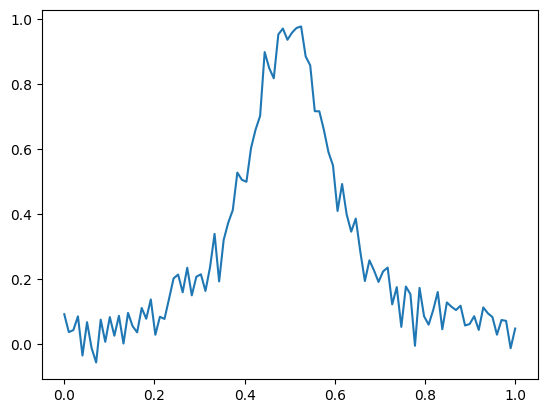

In [78]:
import numpy as np
from matplotlib import pyplot as plt

signal_x = np.linspace(0, 1, 100)
signal_y = 1 / (1 + (signal_x * 10 - 5)**2) + .05 * np.random.randn(signal_x.size)

plt.plot(signal_x, signal_y)

## Задача 2: Фит кривой

Есть измеренный сигнал заданный равноудалёнными отсчётами `signal_x` и значениями `signal_y`. Этот сигнал представляет собой модельную функцию + шум. Нужно аппроксимировать этот сигнал модельной функцией
$$
f(x| x_0, A, \gamma) = \frac{1}{1+\gamma \cdot (x-x_0)^2}, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, [1]
$$
и определить значения параметров $A$, $x_0$, $\gamma$.
#### curve_fit
Функция `curve_fit` выполняет оптимизацию модельной функции на предоставленных данных методом наименьших квадратов. Её параметры:
```Python
curve_fit(
    f,  # модельная функция
    xdata,  # аппроксимируемые точки, координата x
    ydata,  # аппроксимируемые точки, координата y
    p0  # начальные значения оптимизируемых параметров модельной функции
)
```

a =  2.050000000004471 ± 0.20207259304218092
b =  -0.06666666666899257 ± 0.43652672115882907


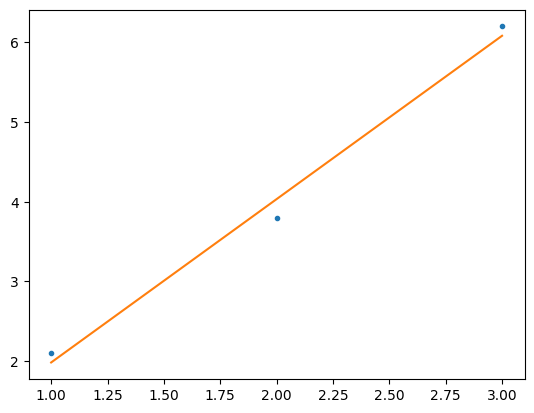

In [89]:
# пример использования curve_fit
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# определяем модельную функцию. линейная функция с 2 параметрами. важно что точки x идут первым аргументом, а оптимизируемые параметры последующими
def f(x, a, b):
    return a * x + b

# точки которые будем аппроксимировать
xs = np.array([1, 2, 3])
ys = np.array([2.1, 3.8, 6.2])

# рисуем на графике аппроксимируемые точки
plt.plot(xs, ys, '.')

# Оптимизационный алгоритм должен начинать работу с какого-то значения параметров модели. Их нужно задавать вручную.
# У функции f которую мы определили выше кроме аргумента x есть ещё два параметра: a, b. 
# Допустим мы хотим начать оптимизацию со значений a = 0., b = 1.
# Тогда в функцию curve_fit четвёртым аргументом надо передать массив из двух элементов следующего вида
p0 = [0, 1]
popt, pcov = curve_fit(f, xs, ys, p0)
# функция curve_fit возвращает кортеж из двух numpy-массивов: оптимальные знчения параметров и матрица ковариации.
# на предыдущей строке мы записали их в переменные popt и pcov соответственно.
# popt это массив из двух элементов (т.к. у нас два параметра, a и b, если параметров будет больше, размер также увеличится), он содержит результат оптимизации
# pcov это матрица 2 на 2. С её помощью можно рассчитать погрешность (стандартное отклонение) модельных параметров
# обратите внимание на значение b и его погрешность. чему как вы думаете на самом деле равно значение b?
print('a = ', popt[0], '±', np.sqrt(pcov[0, 0]))
print('b = ', popt[1], '±', np.sqrt(pcov[1, 1]))
# строим график модельной функции с оптимизированными параметрами
plt.plot(xs, f(xs, popt[0], popt[1]))

#### Последовательность действий
1. Ознакомьтесь с документацией [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Обратите внимание, что первым аргументом в `curve_fit` передаётся модельная функция. Эта функция должна быть определена специальным образом: первым аргументом принимать вектор точек `x` в которых она должна быть рассчитана, а последующими аргументами (их может быть сколько угодно) должны быть оптимизируемые параметры, т.е. в нашем случае $A$, $x_0$, $\gamma$.
2. Согласно п.1 определите функцию следующего вида (вместо многоточия подставьте выражение сообразное формуле [1].):
```Python
def f(x, a, x0, g):
    return ...
```
3. Постройте график этой функции на точках `signal_x` какими-нибудь случайно выбранными параметрами `a, x0, g`.
4. Попробуйте использовать эти параметры в качестве начальных для оптимизации `curve_fit`. Если оптимизация будет выдавать ошибку, пробуйте менять начальные значения `a, x0, g` так чтобы функция становилась ближе к аппроксимируемым точкам.
5. Выведите оптимальные значения параметров, постройте график функции с оптимальными параметрами.

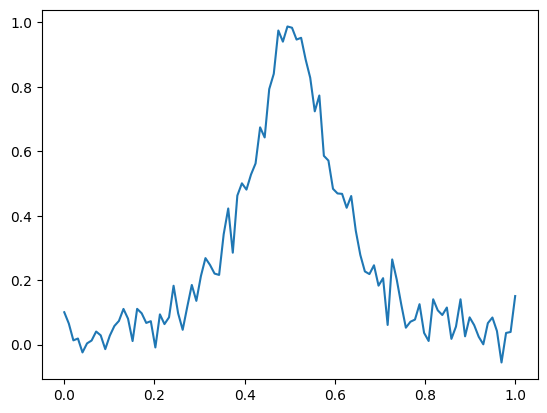

In [90]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

signal_x = np.linspace(0, 1, 100)
signal_y = 1 / (1 + (signal_x * 10 - 5)**2) + .05 * np.random.randn(signal_x.size)

plt.plot(signal_x, signal_y)